In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('lending_club_loan_data.csv')

In [3]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16,0,36369,41.8,25,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17,0,20131,53.3,27,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13,0,11987,92.2,26,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6,0,5472,21.5,13,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13,0,24584,69.8,43,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [4]:
data.shape

(396030, 27)

In [5]:
data.drop(['grade', 'sub_grade','emp_title','issue_d','title','earliest_cr_line','address'],axis=1,inplace=True)

In [6]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  int64  
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   emp_length            377729 non-null  object 
 5   home_ownership        396030 non-null  object 
 6   annual_inc            396030 non-null  float64
 7   verification_status   396030 non-null  object 
 8   loan_status           396030 non-null  object 
 9   purpose               396030 non-null  object 
 10  dti                   396030 non-null  float64
 11  open_acc              396030 non-null  int64  
 12  pub_rec               396030 non-null  int64  
 13  revol_bal             396030 non-null  int64  
 14  revol_util            395754 non-null  float64
 15  

#### Columns with null values
1. emp_length
2. revol_util
3. mort_acc
4. pub_rec_bankruptcies


In [8]:
data.dropna(axis=0,inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340775 entries, 0 to 396028
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             340775 non-null  int64  
 1   term                  340775 non-null  object 
 2   int_rate              340775 non-null  float64
 3   installment           340775 non-null  float64
 4   emp_length            340775 non-null  object 
 5   home_ownership        340775 non-null  object 
 6   annual_inc            340775 non-null  float64
 7   verification_status   340775 non-null  object 
 8   loan_status           340775 non-null  object 
 9   purpose               340775 non-null  object 
 10  dti                   340775 non-null  float64
 11  open_acc              340775 non-null  int64  
 12  pub_rec               340775 non-null  int64  
 13  revol_bal             340775 non-null  int64  
 14  revol_util            340775 non-null  float64
 15  

#### Around 56k instances of data was lost afer removing the rows with null values within it.
    We can perform some mathematical operations to fill the missing values and it is always prefered, but in the above 
    senario we have 396k instances so it is prefered to drop the rows, keeping in mind that we have limited computational
    resoures.

In [10]:
data.tail()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
396024,6000,36 months,13.11,202.49,5 years,RENT,64000.0,Not Verified,Fully Paid,debt_consolidation,10.81,7,0,11456,97.1,9,w,INDIVIDUAL,0.0,0.0
396025,10000,60 months,10.99,217.38,2 years,RENT,40000.0,Source Verified,Fully Paid,debt_consolidation,15.63,6,0,1990,34.3,23,w,INDIVIDUAL,0.0,0.0
396026,21000,36 months,12.29,700.42,5 years,MORTGAGE,110000.0,Source Verified,Fully Paid,debt_consolidation,21.45,6,0,43263,95.7,8,f,INDIVIDUAL,1.0,0.0
396027,5000,36 months,9.99,161.32,10+ years,RENT,56500.0,Verified,Fully Paid,debt_consolidation,17.56,15,0,32704,66.9,23,f,INDIVIDUAL,0.0,0.0
396028,21000,60 months,15.31,503.02,10+ years,MORTGAGE,64000.0,Verified,Fully Paid,debt_consolidation,15.88,9,0,15704,53.8,20,f,INDIVIDUAL,5.0,0.0


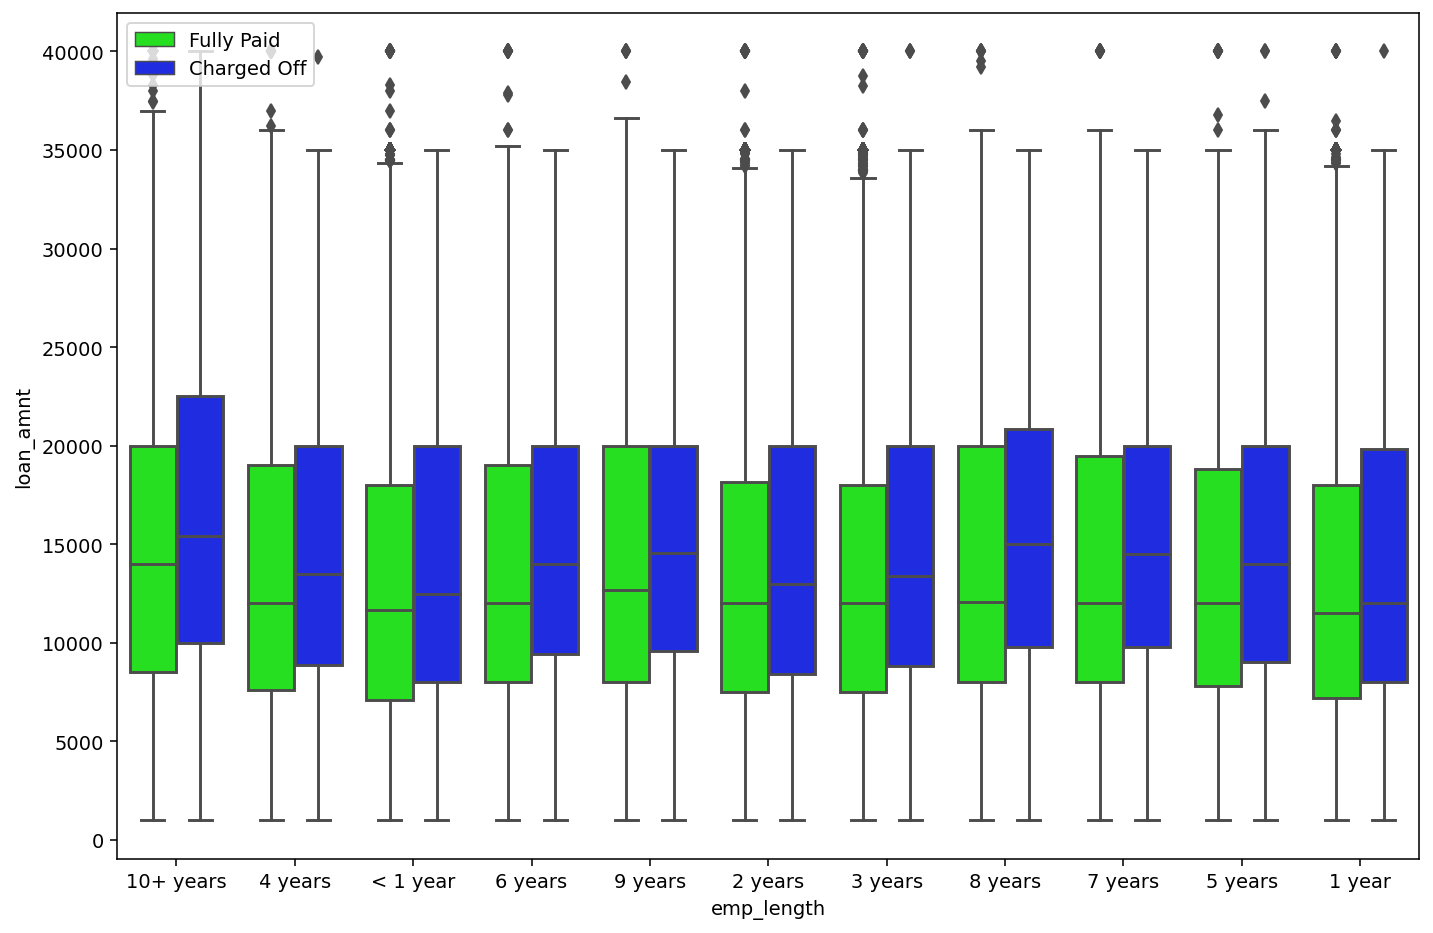

In [11]:
plt.figure(figsize=(12,8),dpi = 140)
sns.boxplot(data = data, x = 'emp_length', y = 'loan_amnt',palette='hsv',hue = 'loan_status')
plt.legend(loc='upper left')
plt.show()

In [12]:
data['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'ANY', 'NONE'], dtype=object)

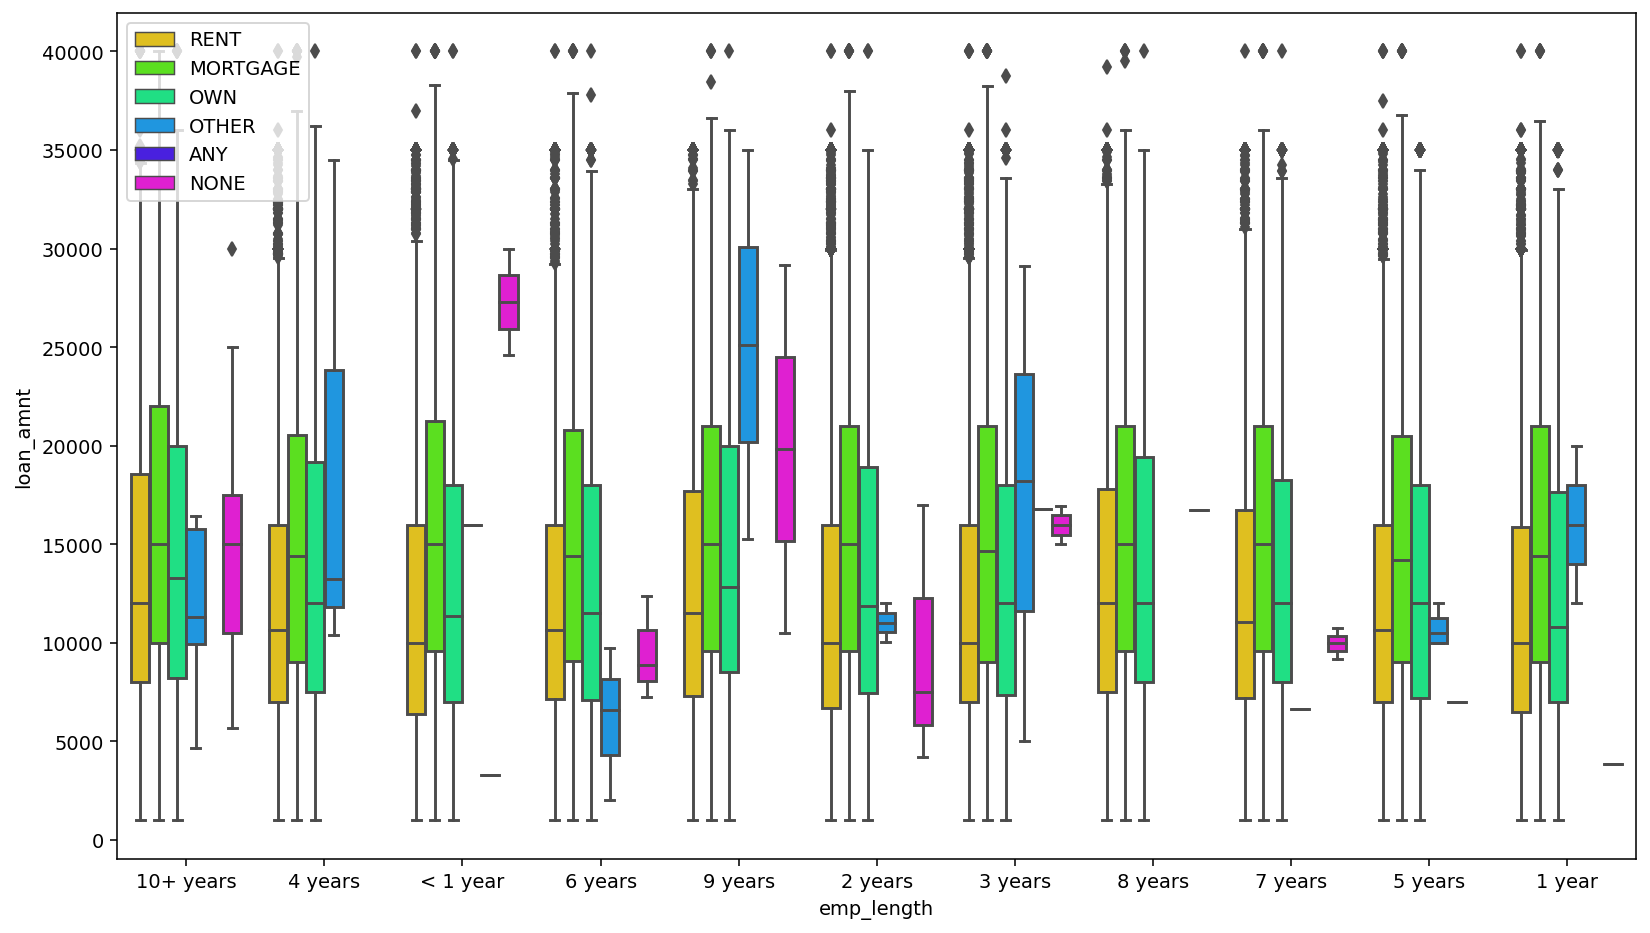

In [13]:
plt.figure(figsize=(14,8),dpi = 140)
sns.boxplot(data = data, x = 'emp_length', y = 'loan_amnt',palette='hsv',hue = 'home_ownership')
plt.legend(loc='upper left')
plt.show()

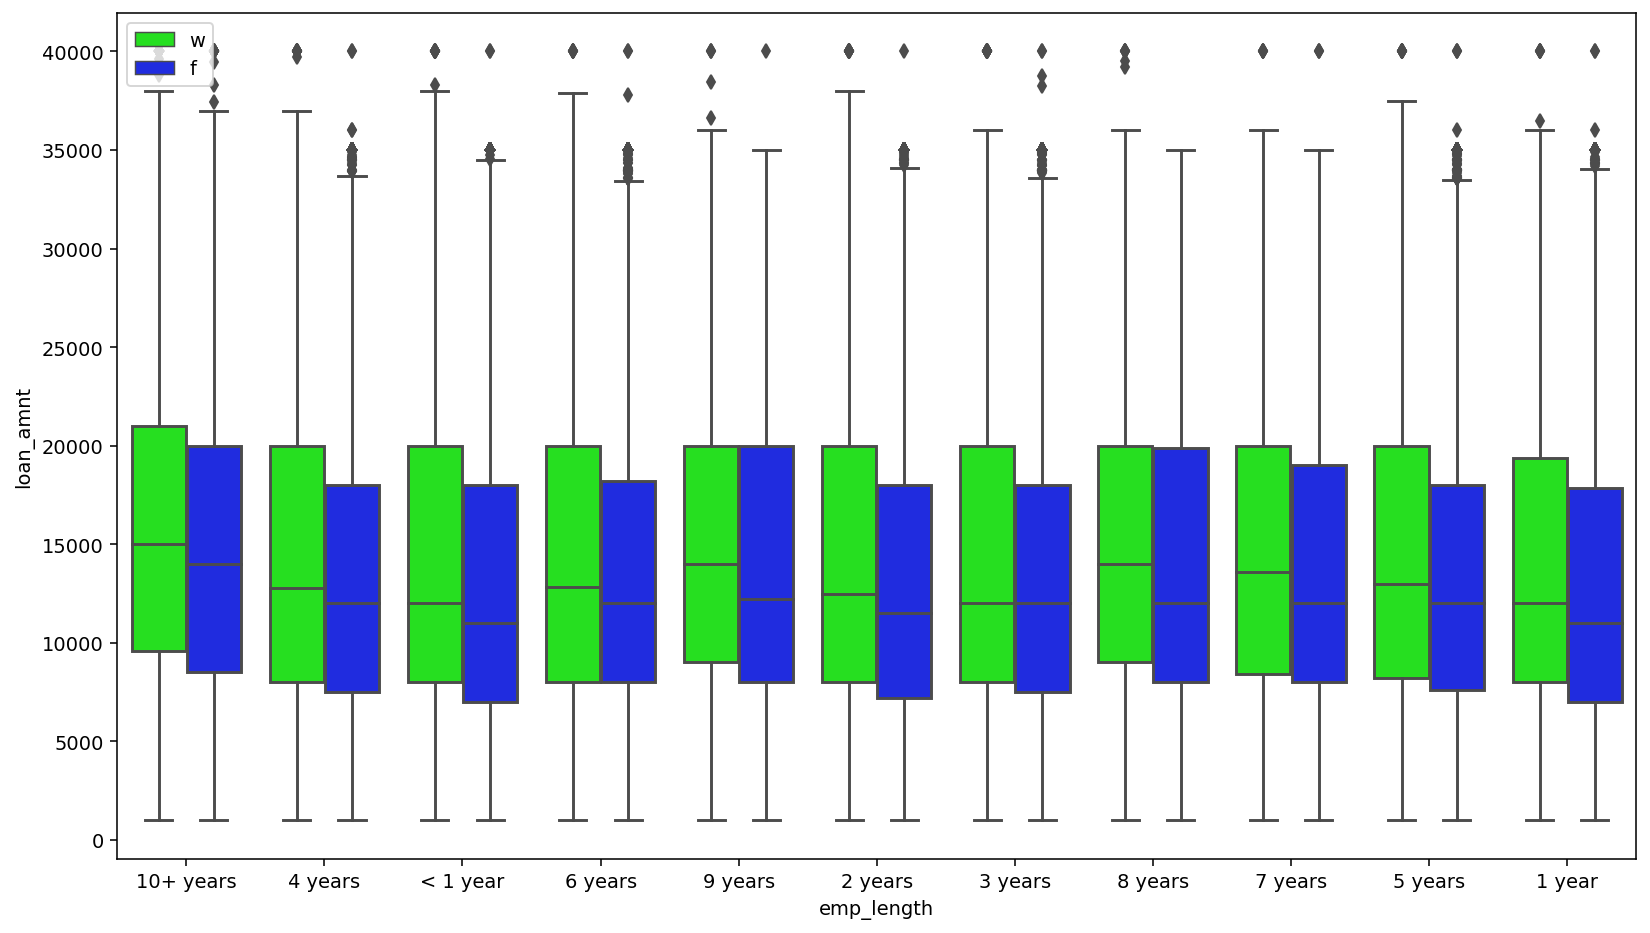

In [14]:
plt.figure(figsize=(14,8),dpi = 140)
sns.boxplot(data = data, x = 'emp_length', y = 'loan_amnt',palette='hsv',hue = 'initial_list_status')
plt.legend(loc='upper left')
plt.show()

In [15]:
data.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000,36 months,11.44,329.48,10+ years,RENT,117000.0,Not Verified,Fully Paid,vacation,26.24,16,0,36369,41.8,25,w,INDIVIDUAL,0.0,0.0
1,8000,36 months,11.99,265.68,4 years,MORTGAGE,65000.0,Not Verified,Fully Paid,debt_consolidation,22.05,17,0,20131,53.3,27,f,INDIVIDUAL,3.0,0.0
2,15600,36 months,10.49,506.97,< 1 year,RENT,43057.0,Source Verified,Fully Paid,credit_card,12.79,13,0,11987,92.2,26,f,INDIVIDUAL,0.0,0.0
3,7200,36 months,6.49,220.65,6 years,RENT,54000.0,Not Verified,Fully Paid,credit_card,2.60,6,0,5472,21.5,13,f,INDIVIDUAL,0.0,0.0
4,24375,60 months,17.27,609.33,9 years,MORTGAGE,55000.0,Verified,Charged Off,credit_card,33.95,13,0,24584,69.8,43,f,INDIVIDUAL,1.0,0.0


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
enc = LabelEncoder()
data['term'] = enc.fit_transform(data['term'])
enc.classes_

array([' 36 months', ' 60 months'], dtype=object)

In [18]:
data.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000,0,11.44,329.48,10+ years,RENT,117000.0,Not Verified,Fully Paid,vacation,26.24,16,0,36369,41.8,25,w,INDIVIDUAL,0.0,0.0
1,8000,0,11.99,265.68,4 years,MORTGAGE,65000.0,Not Verified,Fully Paid,debt_consolidation,22.05,17,0,20131,53.3,27,f,INDIVIDUAL,3.0,0.0
2,15600,0,10.49,506.97,< 1 year,RENT,43057.0,Source Verified,Fully Paid,credit_card,12.79,13,0,11987,92.2,26,f,INDIVIDUAL,0.0,0.0
3,7200,0,6.49,220.65,6 years,RENT,54000.0,Not Verified,Fully Paid,credit_card,2.60,6,0,5472,21.5,13,f,INDIVIDUAL,0.0,0.0
4,24375,1,17.27,609.33,9 years,MORTGAGE,55000.0,Verified,Charged Off,credit_card,33.95,13,0,24584,69.8,43,f,INDIVIDUAL,1.0,0.0


In [19]:
data.emp_length.replace('10+ years','91 years',inplace = True)

In [20]:
data.emp_length.replace('< 1 year','0 year',inplace = True)

In [21]:
data.emp_length.unique()

array(['91 years', '4 years', '0 year', '6 years', '9 years', '2 years',
       '3 years', '8 years', '7 years', '5 years', '1 year'], dtype=object)

In [22]:
enc = LabelEncoder()

In [23]:
data['emp_length'] = enc.fit_transform(data['emp_length'])
enc.classes_

array(['0 year', '1 year', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '91 years'],
      dtype=object)

In [24]:
data.tail()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
396024,6000,0,13.11,202.49,5,RENT,64000.0,Not Verified,Fully Paid,debt_consolidation,10.81,7,0,11456,97.1,9,w,INDIVIDUAL,0.0,0.0
396025,10000,1,10.99,217.38,2,RENT,40000.0,Source Verified,Fully Paid,debt_consolidation,15.63,6,0,1990,34.3,23,w,INDIVIDUAL,0.0,0.0
396026,21000,0,12.29,700.42,5,MORTGAGE,110000.0,Source Verified,Fully Paid,debt_consolidation,21.45,6,0,43263,95.7,8,f,INDIVIDUAL,1.0,0.0
396027,5000,0,9.99,161.32,10,RENT,56500.0,Verified,Fully Paid,debt_consolidation,17.56,15,0,32704,66.9,23,f,INDIVIDUAL,0.0,0.0
396028,21000,1,15.31,503.02,10,MORTGAGE,64000.0,Verified,Fully Paid,debt_consolidation,15.88,9,0,15704,53.8,20,f,INDIVIDUAL,5.0,0.0


In [25]:
data.home_ownership.unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'ANY', 'NONE'], dtype=object)

In [26]:
arr = ['NONE','ANY','OTHER','RENT','MORTGAGE','OWN']
i = 0
for j in arr:
    data.home_ownership.replace(j,i,inplace = True)
    i = i+1

In [27]:
data.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000,0,11.44,329.48,10,3,117000.0,Not Verified,Fully Paid,vacation,26.24,16,0,36369,41.8,25,w,INDIVIDUAL,0.0,0.0
1,8000,0,11.99,265.68,4,4,65000.0,Not Verified,Fully Paid,debt_consolidation,22.05,17,0,20131,53.3,27,f,INDIVIDUAL,3.0,0.0
2,15600,0,10.49,506.97,0,3,43057.0,Source Verified,Fully Paid,credit_card,12.79,13,0,11987,92.2,26,f,INDIVIDUAL,0.0,0.0
3,7200,0,6.49,220.65,6,3,54000.0,Not Verified,Fully Paid,credit_card,2.60,6,0,5472,21.5,13,f,INDIVIDUAL,0.0,0.0
4,24375,1,17.27,609.33,9,4,55000.0,Verified,Charged Off,credit_card,33.95,13,0,24584,69.8,43,f,INDIVIDUAL,1.0,0.0


In [28]:
arr = data.verification_status.unique()

In [29]:
z=0
for i in arr:
    data.verification_status.replace(i,z,inplace = True)
    z+=1

In [30]:
data.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000,0,11.44,329.48,10,3,117000.0,0,Fully Paid,vacation,26.24,16,0,36369,41.8,25,w,INDIVIDUAL,0.0,0.0
1,8000,0,11.99,265.68,4,4,65000.0,0,Fully Paid,debt_consolidation,22.05,17,0,20131,53.3,27,f,INDIVIDUAL,3.0,0.0
2,15600,0,10.49,506.97,0,3,43057.0,1,Fully Paid,credit_card,12.79,13,0,11987,92.2,26,f,INDIVIDUAL,0.0,0.0
3,7200,0,6.49,220.65,6,3,54000.0,0,Fully Paid,credit_card,2.60,6,0,5472,21.5,13,f,INDIVIDUAL,0.0,0.0
4,24375,1,17.27,609.33,9,4,55000.0,2,Charged Off,credit_card,33.95,13,0,24584,69.8,43,f,INDIVIDUAL,1.0,0.0


In [33]:
data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [36]:
enc = LabelEncoder()

In [37]:
data.loan_status = enc.fit_transform(data.loan_status)

In [38]:
data.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000,0,11.44,329.48,10,3,117000.0,0,1,vacation,26.24,16,0,36369,41.8,25,w,INDIVIDUAL,0.0,0.0
1,8000,0,11.99,265.68,4,4,65000.0,0,1,debt_consolidation,22.05,17,0,20131,53.3,27,f,INDIVIDUAL,3.0,0.0
2,15600,0,10.49,506.97,0,3,43057.0,1,1,credit_card,12.79,13,0,11987,92.2,26,f,INDIVIDUAL,0.0,0.0
3,7200,0,6.49,220.65,6,3,54000.0,0,1,credit_card,2.60,6,0,5472,21.5,13,f,INDIVIDUAL,0.0,0.0
4,24375,1,17.27,609.33,9,4,55000.0,2,0,credit_card,33.95,13,0,24584,69.8,43,f,INDIVIDUAL,1.0,0.0


In [39]:
data.purpose.unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'car', 'moving', 'house', 'wedding', 'renewable_energy',
       'educational'], dtype=object)

In [40]:
arr = ['other','vacation','major_purchase','car','home_improvement','wedding','small_business','renewable_energy',
       'moving','credit_card','debt_consolidation','house','educational','medical']

In [41]:
l=0
for i in arr:
    data.purpose.replace(i,l,inplace=True)
    l+=1

In [42]:
data.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000,0,11.44,329.48,10,3,117000.0,0,1,1,26.24,16,0,36369,41.8,25,w,INDIVIDUAL,0.0,0.0
1,8000,0,11.99,265.68,4,4,65000.0,0,1,10,22.05,17,0,20131,53.3,27,f,INDIVIDUAL,3.0,0.0
2,15600,0,10.49,506.97,0,3,43057.0,1,1,9,12.79,13,0,11987,92.2,26,f,INDIVIDUAL,0.0,0.0
3,7200,0,6.49,220.65,6,3,54000.0,0,1,9,2.60,6,0,5472,21.5,13,f,INDIVIDUAL,0.0,0.0
4,24375,1,17.27,609.33,9,4,55000.0,2,0,9,33.95,13,0,24584,69.8,43,f,INDIVIDUAL,1.0,0.0


In [43]:
enc = LabelEncoder()
data.initial_list_status = enc.fit_transform(data.initial_list_status)

In [44]:
data.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000,0,11.44,329.48,10,3,117000.0,0,1,1,26.24,16,0,36369,41.8,25,1,INDIVIDUAL,0.0,0.0
1,8000,0,11.99,265.68,4,4,65000.0,0,1,10,22.05,17,0,20131,53.3,27,0,INDIVIDUAL,3.0,0.0
2,15600,0,10.49,506.97,0,3,43057.0,1,1,9,12.79,13,0,11987,92.2,26,0,INDIVIDUAL,0.0,0.0
3,7200,0,6.49,220.65,6,3,54000.0,0,1,9,2.60,6,0,5472,21.5,13,0,INDIVIDUAL,0.0,0.0
4,24375,1,17.27,609.33,9,4,55000.0,2,0,9,33.95,13,0,24584,69.8,43,0,INDIVIDUAL,1.0,0.0


In [45]:
data.application_type.unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [46]:
arr = ['INDIVIDUAL','DIRECT_PAY','JOINT']


In [47]:
c = 0
for i in arr:
    data.application_type.replace(i,c,inplace=True)
    c+=1

In [49]:
data.tail()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
396024,6000,0,13.11,202.49,5,3,64000.0,0,1,10,10.81,7,0,11456,97.1,9,1,0,0.0,0.0
396025,10000,1,10.99,217.38,2,3,40000.0,1,1,10,15.63,6,0,1990,34.3,23,1,0,0.0,0.0
396026,21000,0,12.29,700.42,5,4,110000.0,1,1,10,21.45,6,0,43263,95.7,8,0,0,1.0,0.0
396027,5000,0,9.99,161.32,10,3,56500.0,2,1,10,17.56,15,0,32704,66.9,23,0,0,0.0,0.0
396028,21000,1,15.31,503.02,10,4,64000.0,2,1,10,15.88,9,0,15704,53.8,20,0,0,5.0,0.0


In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()

In [62]:
x = scaler.fit_transform(data.drop('loan_status',axis=1))

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    data.loan_status, test_size=0.30, random_state=42)

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
classifier_dt = DecisionTreeClassifier()

In [67]:
classifier_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [68]:
y_pred = classifier_dt.predict(X_test)

In [69]:
from sklearn.metrics import confusion_matrix,classification_report

In [70]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 5865 14290]
 [16101 65977]]
              precision    recall  f1-score   support

           0       0.27      0.29      0.28     20155
           1       0.82      0.80      0.81     82078

    accuracy                           0.70    102233
   macro avg       0.54      0.55      0.55    102233
weighted avg       0.71      0.70      0.71    102233



In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rf = RandomForestClassifier()

In [73]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [75]:
y_pred = rf.predict(X_test)

In [76]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 1755 18400]
 [ 1724 80354]]
              precision    recall  f1-score   support

           0       0.50      0.09      0.15     20155
           1       0.81      0.98      0.89     82078

    accuracy                           0.80    102233
   macro avg       0.66      0.53      0.52    102233
weighted avg       0.75      0.80      0.74    102233

